# Analysis of fandango ratings

This project will analysis the data of rating from fandangos site. The goal is check if have been changes in the site after Hickey's analysis

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [6]:
scoresComparation = pd.read_csv('fandango_score_comparison.csv')
scoresComparation.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [12]:
columnsScores = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
scoresComparation = scoresComparation[columnsScores]

In [9]:
ratings = pd.read_csv('movie_ratings_16_17.csv')
ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [16]:
columnsRatings = ['movie', 'year', 'fandango']
ratings = ratings[columnsRatings]

In [19]:
# No filme on dataset has less than 30 votes
(scoresComparation.Fandango_votes < 30).sum()

0

In [90]:
scores2015bol = scoresComparation.FILM.str[-5:-1] == '2015'
fandangoBefore = scoresComparation[scores2015bol]
fandangoAfter = ratings[ratings.year == 2016]

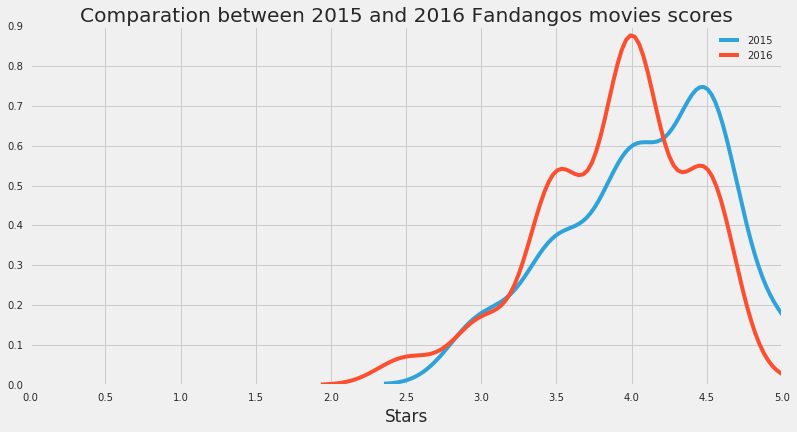

In [91]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
sns.kdeplot(fandangoBefore.Fandango_Stars, label= 2015)
sns.kdeplot(fandangoAfter.fandango, label = 2016)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Comparation between 2015 and 2016 Fandangos movies scores')
plt.xlim(0,5)
plt.xlabel('Stars')
plt.show()

In [133]:
valuesBefore = pd.DataFrame(fandangoBefore.Fandango_Stars.value_counts().sort_index()).rename(columns = {'Fandango_Stars':'Before'})
valuesAfter = pd.DataFrame(fandangoAfter.fandango.value_counts().sort_index()).rename(columns = {'fandango':'After'})

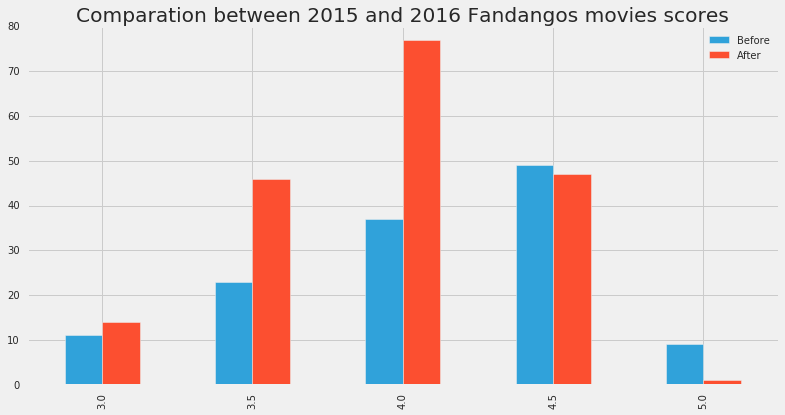

In [142]:
valuesBefore.merge(valuesAfter, how = 'inner', right_index = True, left_index = True).plot.bar(figsize = (12,6))
plt.title('Comparation between 2015 and 2016 Fandangos movies scores')
plt.show()

The distribuition with relative frequences is more usefull. But the graph with absolute frequences also shows that after Hickey's analysis fandangos changed something that made the movies receives less 5 stars.

In [158]:
years = dict()
years['before'] = dict()
years['after'] = dict()
years['before']['mean'] = fandangoBefore.Fandango_Stars.mean()
years['before']['median'] = fandangoBefore.Fandango_Stars.median()
years['before']['mode'] = fandangoBefore.Fandango_Stars.mode()[0]
years['after']['mean'] = fandangoAfter.fandango.mean()
years['after']['median'] = fandangoAfter.fandango.median()
years['after']['mode'] = fandangoAfter.fandango.mode()[0]

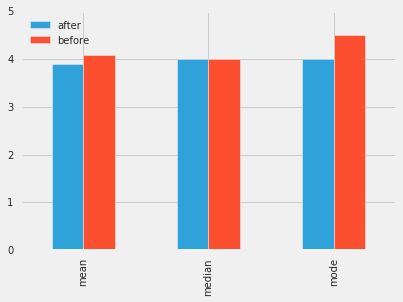

In [162]:
pd.DataFrame(years).plot.bar()
plt.ylim(0,5)
plt.show()

Mean and median do not changed a lot but we can see a cleary alteration on the mode that shows that the score more common is 4 isted of 4.5